# Customer Churn Prediction

# Import Library

In [880]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 
from imblearn import over_sampling

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import LabelEncoder


In [881]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load dataset

This dataset contains customer information and churn status. This dataset will be used to predict customer tendency to churn in the future. 

In [882]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Descriptive Statistic

In [883]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No missing value found in the dataset.

In [884]:
# Change data type of TotalCharges from str to float, since it contains numerical value. 

df.TotalCharges = df.TotalCharges.replace(' ').astype(float)

In [885]:
df.duplicated().any()

False

No duplicate row found in the dataset. 

In [886]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2285.169963
std,0.368612,24.559481,30.090047,2267.544511
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.675000
50%,0.000000,29.000000,70.350000,1398.250000
75%,0.000000,55.000000,89.850000,3803.050000
max,1.000000,72.000000,118.750000,8684.800000


In [887]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


customerID will be dropped since all values are unique. 

In [888]:
df.drop(columns= 'customerID', inplace= True)

In [889]:
for col in df.columns:
    print(f'Percentage of unique number in {col} :')
    print(round(df[col].value_counts(normalize = True)*100,2))
    print()

Percentage of unique number in gender :
gender
Male      50.48
Female    49.52
Name: proportion, dtype: float64

Percentage of unique number in SeniorCitizen :
SeniorCitizen
0    83.79
1    16.21
Name: proportion, dtype: float64

Percentage of unique number in Partner :
Partner
No     51.7
Yes    48.3
Name: proportion, dtype: float64

Percentage of unique number in Dependents :
Dependents
No     70.04
Yes    29.96
Name: proportion, dtype: float64

Percentage of unique number in tenure :
tenure
1     8.70
72    5.14
2     3.38
3     2.84
4     2.50
      ... 
28    0.81
39    0.80
44    0.72
36    0.71
0     0.16
Name: proportion, Length: 73, dtype: float64

Percentage of unique number in PhoneService :
PhoneService
Yes    90.32
No      9.68
Name: proportion, dtype: float64

Percentage of unique number in MultipleLines :
MultipleLines
No                  48.13
Yes                 42.18
No phone service     9.68
Name: proportion, dtype: float64

Percentage of unique number in InternetSer

The target (Churn) in the dataset has imbalance proportion (73.46 : 26.54). Oversampling technique will be use to train classification model for this case. 

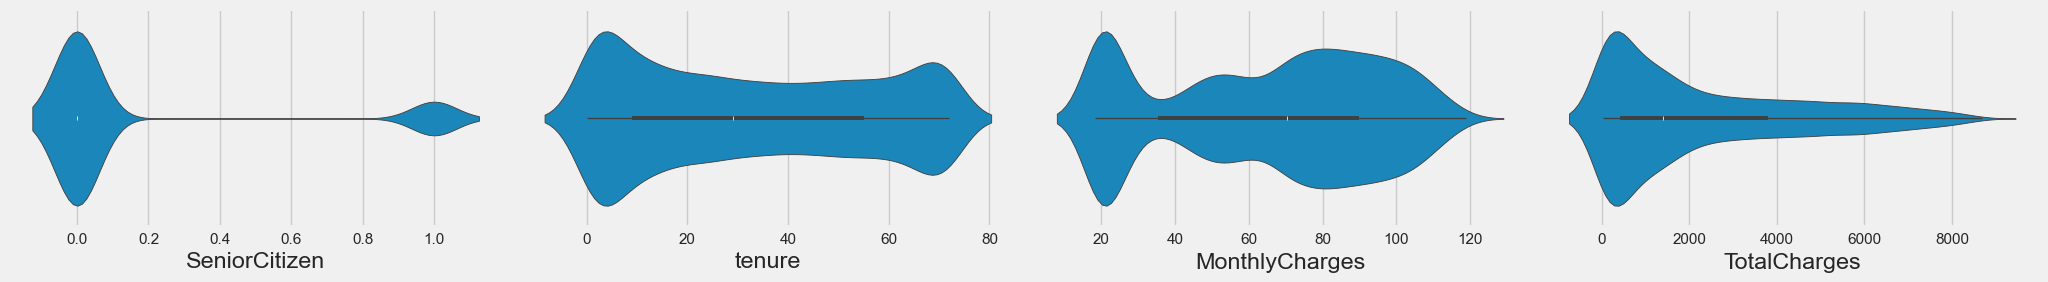

In [890]:
# Distribution of numerical data

numerical = df.select_dtypes(include=['float64', 'int64']).columns

for i in range(0, len(numerical)):
    plt.subplot(3, 4, i+1)
    sns.violinplot(x=df[numerical[i]])
    plt.tight_layout()

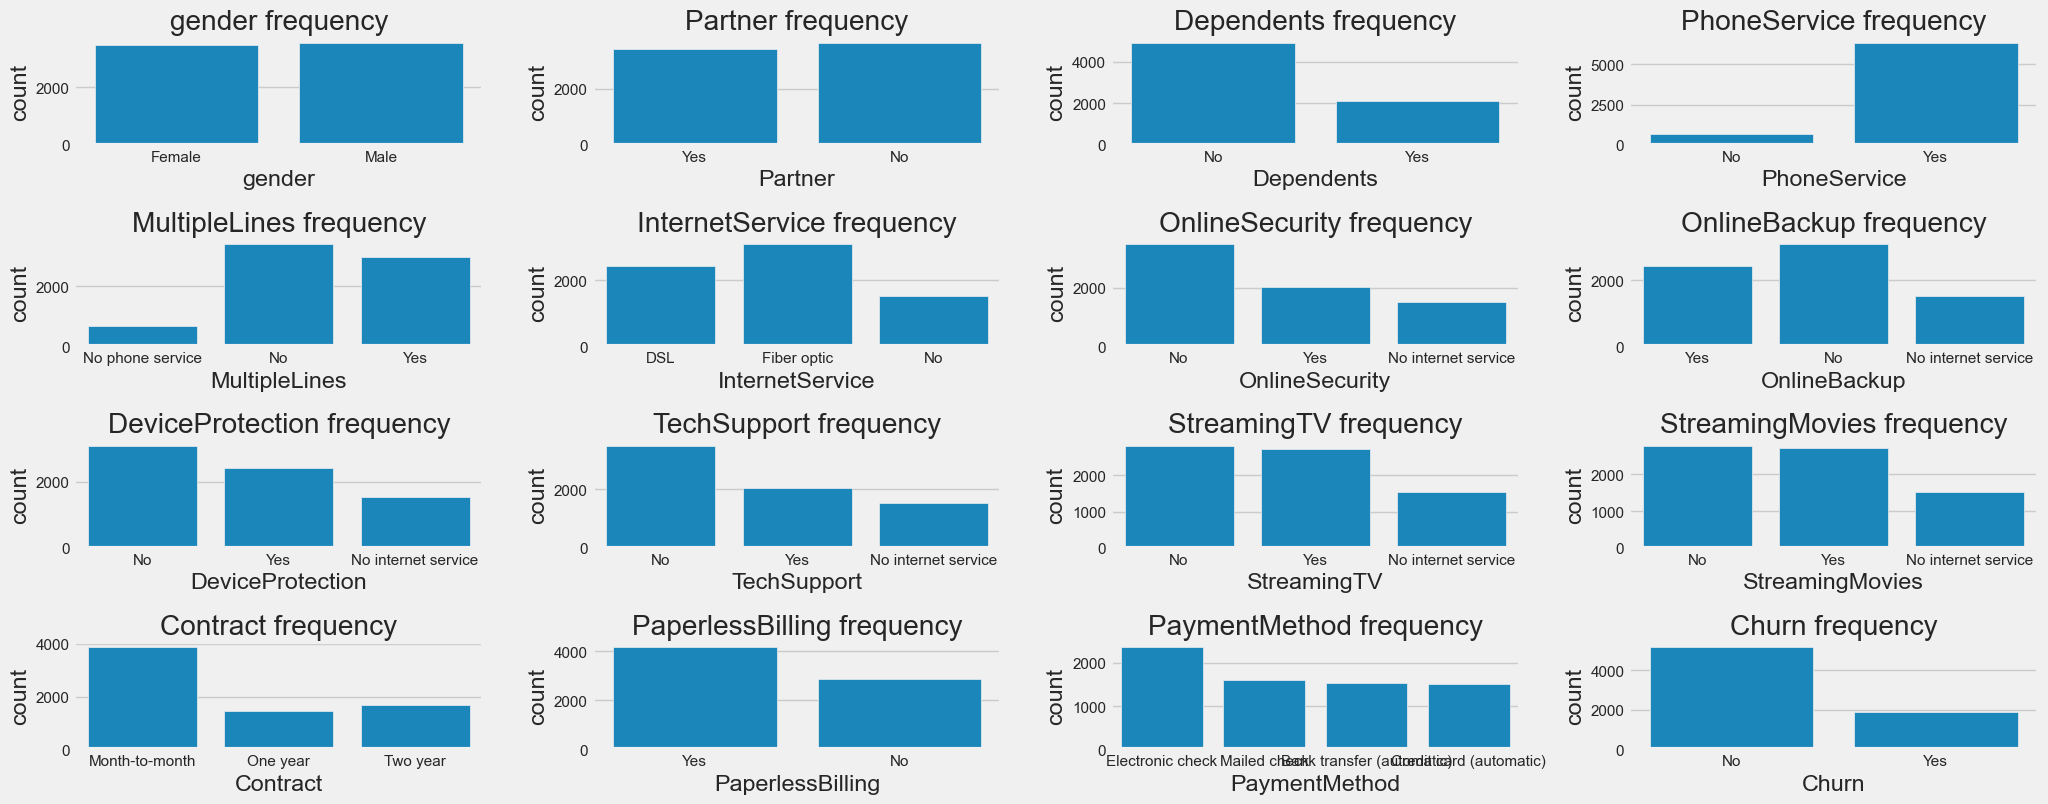

In [891]:
# Distribution of categorical data

categorical = df.select_dtypes(include='object').columns

for i in range(0, len(categorical)):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=df[categorical[i]])
    plt.title(f'{categorical[i]} frequency')
    plt.tight_layout()

# Handling Categorical Data

## Label Encoding

Label Encoding will be used for features that contains only 2 unique values.

In [892]:
label_encoding = df.select_dtypes(include='object')

label_encoding_list = []

for i in label_encoding.columns:
    if label_encoding[i].unique().shape[0] < 3:
        label_encoding_list.append(i)


label_encoding_list

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [893]:
label_encoding = df[label_encoding_list]

label_encoder = LabelEncoder()

for col in label_encoding.columns:
    df[col] = label_encoder.fit_transform(df[col])

## Frequency Encoding

Frequency Encoding will be used in the features that contain more than 2 unique values. Frequency Encoding will be in range of 0 - 1, since the other features mostly in that range. 

In [894]:
freq_encoding = df.select_dtypes(include='object')

freq_encoding_list = []

for i in freq_encoding.columns:
    if freq_encoding[i].unique().shape[0] > 2:
        freq_encoding_list.append(i)


freq_encoding_list

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [895]:
for i in freq_encoding_list:
    freq = df[i].value_counts().reset_index()
    freq.rename(columns={'count': 'freq_i'}, inplace= True)
    freq['temporary'] = round((freq['freq_i']/freq['freq_i'].sum())*1,2)

    freq_dict = dict(zip(freq[i], freq['temporary']))
    df[i] = df[i].map(freq_dict)


### Dataset Information after Feature Encoding

In [896]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0.10,0.34,0.50,0.34,0.44,0.49,0.4,0.4,0.55,1,0.34,29.85,29.85,0
1,1,0,0,0,34,1,0.48,0.34,0.29,0.44,0.34,0.49,0.4,0.4,0.21,0,0.23,56.95,1889.50,0
2,1,0,0,0,2,1,0.48,0.34,0.29,0.34,0.44,0.49,0.4,0.4,0.55,1,0.23,53.85,108.15,1
3,1,0,0,0,45,0,0.10,0.34,0.29,0.44,0.34,0.29,0.4,0.4,0.21,0,0.22,42.30,1840.75,0
4,0,0,0,0,2,1,0.48,0.44,0.50,0.44,0.44,0.49,0.4,0.4,0.55,1,0.34,70.70,151.65,1


### Train Test Split for Dataset (before Oversampling handling)

In [897]:
# train test split dataset

X = df.drop(columns='Churn')
y = df[['Churn']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3, random_state= 42)


# Multivariate Analysis

Check for Multicollinearity using Variation Inflation Factor and Heatmap Correlation

In [898]:
X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
               index=X_vif.columns).reset_index()

vif_df.columns = ['feature','vif_score']

vif_df = vif_df.loc[vif_df.feature!='const']

vif_df

,feature,vif_score
1,gender,1.003413
2,SeniorCitizen,1.151024
3,Partner,1.458172
4,Dependents,1.380903
5,tenure,6.367250
6,PhoneService,24.763968
7,MultipleLines,21.078617
8,InternetService,19.192207
9,OnlineSecurity,2.481006
10,OnlineBackup,4.678069


There are some features contains high VIF. Feature selection will be conducted using heatmap correlation analysis. 

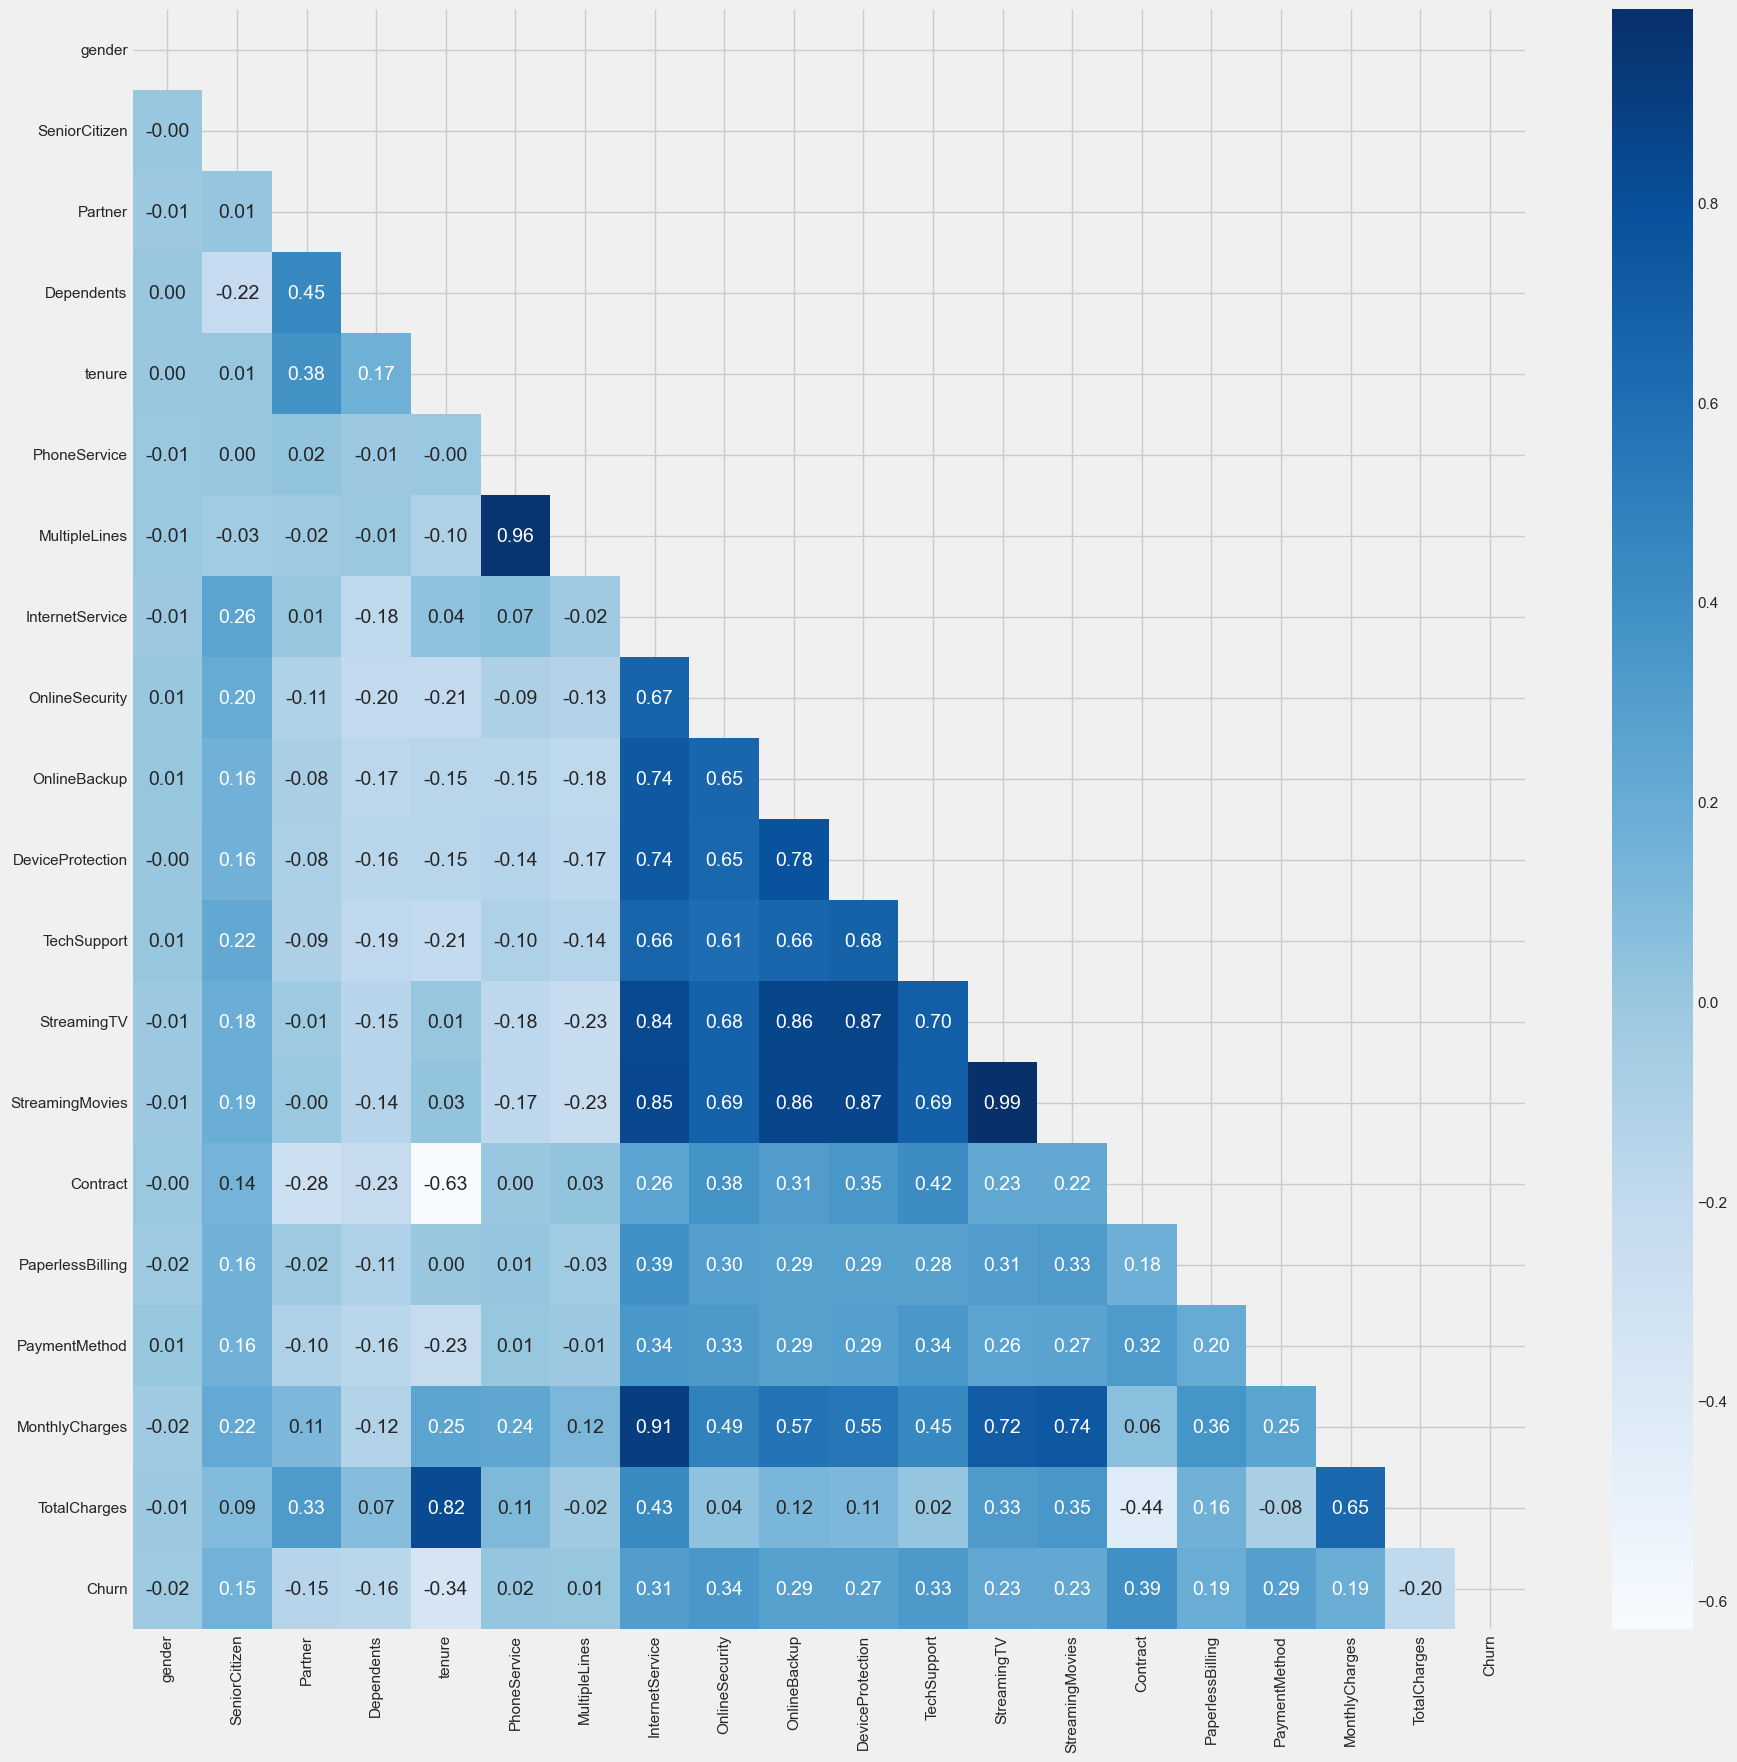

In [899]:
# heatmap correlation
df_corr = pd.concat([X_train, y_train], axis=1)
corr = df_corr.corr()

plt.figure(figsize=(20,20))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap = 'Blues', annot=True, fmt='.2f', mask = mask)
plt.show()

Features that have high correlation with each other will be dropped. Since OnlineSecurity has the highest correlation with target (0.34), the feature will be used for modelling. 

In [900]:
X_train = X_train.drop(columns=['TotalCharges', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'DeviceProtection', 'TechSupport'])
X_val = X_val.drop(columns=['TotalCharges', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'DeviceProtection', 'TechSupport'])

Recheck VIF after Feature Selection

In [901]:
X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
               index=X_vif.columns).reset_index()

vif_df.columns = ['feature','vif_score']

vif_df = vif_df.loc[vif_df.feature!='const']

vif_df

,feature,vif_score
1,gender,1.002162
2,SeniorCitizen,1.140538
3,Partner,1.453618
4,Dependents,1.377738
5,tenure,2.073243
6,PhoneService,1.130279
7,InternetService,3.482665
8,OnlineSecurity,2.232565
9,OnlineBackup,2.742767
10,Contract,2.002335


VIF values for all features already below 4, which indicate that features already have low correlation to each other.

# Imbalance Handling using SMOTE

In [902]:
# Oversampling with SMOTE 

X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [903]:
# Train Test Split for comparing evaluation metric with and without Oversampling method

X_train_, X_test, y_train_, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.3, random_state=42)

# Baseline model using cross validation method

In [904]:
models = [
    ['Logistic Regression', LogisticRegression(random_state=42)],
    ['KNN', KNeighborsClassifier()],
    ['Decision Tree', DecisionTreeClassifier(random_state=42)],
    ['Random Forest', RandomForestClassifier(random_state=42)],
    ['AdaBoost', AdaBoostClassifier(random_state=42)],
    ['XGBoost', XGBClassifier()],
    ['CatBoost', CatBoostClassifier(random_state = 42, verbose=False)]
]

def cross_validation(model):
    model_name = []

    cv_accuracy_train_mean = []
    cv_accuracy_val_mean = []
    cv_precision_train_mean = []
    cv_precision_val_mean = []
    cv_recall_train_mean = []
    cv_recall_val_mean = []
    cv_roc_auc_train_mean = []
    cv_roc_auc_val_mean = []

    for name, model in models:
        model_name.append(name)
        model.fit(X_train_, y_train_)
        #scoring
        scoring= ['accuracy', 'precision', 'recall', 'roc_auc']

        # test
        cv_score = cross_validate(model, X_train_, y_train_, cv=5, scoring = scoring, return_train_score=True)

        cv_accuracy_train_mean.append(cv_score['train_accuracy'].mean())
        cv_accuracy_val_mean.append(cv_score['test_accuracy'].mean())

        cv_precision_train_mean.append(cv_score['train_precision'].mean())
        cv_precision_val_mean.append(cv_score['test_precision'].mean())

        cv_recall_train_mean.append(cv_score['train_recall'].mean())
        cv_recall_val_mean.append(cv_score['test_recall'].mean())

        cv_roc_auc_train_mean.append((cv_score['train_roc_auc']).mean())
        cv_roc_auc_val_mean.append((cv_score['test_roc_auc']).mean())


    return pd.DataFrame({
        'Model': model_name,
        'Accuracy Train': cv_accuracy_train_mean,
        'Accuracy Validation': cv_accuracy_val_mean,
        'Precision Train': cv_precision_train_mean,
        'Precision Validation': cv_precision_val_mean,
        'Recall Train': cv_recall_train_mean,
        'Recall Validation': cv_recall_val_mean,
        'ROC-AUC Train': cv_roc_auc_train_mean,
        'ROC-AUC Validation': cv_roc_auc_val_mean
    })


In [905]:
cv_result = cross_validation(models)
cv_result

,Model,Accuracy Train,Accuracy Validation,Precision Train,Precision Validation,Recall Train,Recall Validation,ROC-AUC Train,ROC-AUC Validation
0,Logistic Regression,0.757172,0.755747,0.742483,0.741458,0.789675,0.787613,0.840013,0.838416
1,KNN,0.828011,0.752014,0.788414,0.715764,0.898118,0.839728,0.918461,0.822550
2,Decision Tree,0.972441,0.804872,0.970174,0.798323,0.975019,0.817784,0.997896,0.814061
3,Random Forest,0.972441,0.841618,0.960919,0.847355,0.985110,0.835022,0.995390,0.910711
4,AdaBoost,0.835969,0.831988,0.822627,0.817250,0.857856,0.856580,0.923302,0.920502
5,XGBoost,0.935891,0.836509,0.922228,0.836814,0.952488,0.837369,0.984848,0.921304
6,CatBoost,0.896493,0.848691,0.892852,0.847256,0.901842,0.851871,0.966100,0.927280


- Based on baseline models, AdaBoost will be used for further evaluation, since the model give high value for each evaluation metrics and not overfit. 
- Even though other models such as Decision Tree and Random Forest give higher evaluation metrics value than AdaBoost, we will not use them since they tend to overfit. 
- LogisticRegression is also a great candidate to use, but we will not use that in this case since the model give lower performance than AdaBoost.

## Evaluation

Using AdaBoostClassifier as the best model. 

In [906]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train_,y_train_)
y_pred = model.predict(X_test)

## Evaluation Metrics between Train and Test Data for Oversampling Technique 

In [907]:
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1098
           1       0.81      0.85      0.83      1083

    accuracy                           0.83      2181
   macro avg       0.83      0.83      0.83      2181
weighted avg       0.83      0.83      0.83      2181



- The model give great evaluation metrics, with F1-score = 0.84 and accuracy = 0.83. 
- We will use this data to compare the evaluation metrics for ground truth data testing. 

## Evaluation Metrics between Train and Test Data for Ground Truth 

In [908]:
y_pred_val = model.predict(X_val)

In [909]:
print(classification_report(y_val, y_pred_val, digits=2))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1539
           1       0.59      0.74      0.66       574

    accuracy                           0.79      2113
   macro avg       0.74      0.78      0.75      2113
weighted avg       0.81      0.79      0.80      2113



Compared to evaluation metrics from Oversampling Technique, the evaluation metrics for Ground Truth tend to be lower, with F1-score = 0.65 and accuracy = 0.79. 

## Confusion Matrix for Ground Truth Data

In [910]:
conf_matrix = confusion_matrix(y_val, y_pred_val)

pd.DataFrame(conf_matrix, index = ['Actual (Not Churn)', 'Actual (Churn)'], columns = ['Predicted (Not Churn)', 'Predicted (Churn)'])

,Predicted (Not Churn),Predicted (Churn)
Actual (Not Churn),1249,290
Actual (Churn),149,425


- Based on the confusion matrix, the model can accurately predicted customer that tend not to churn for 1238 and customer tend to churn for 425. 
- Churn prediction is use to prevent customer from churn in the future, so this case will be focus on Recall evaluation metric. 
- Recall is used when we are more concerned for False Negative. 
- False Negative means the model said the customer will not churn while the actual the customer will churn. This is not good for the company, since they tend not to do some actions to prevent them from churn.
- Recall value for the model is 0.74, which is quite good for the model to discern whether customer will churn in the future. 